# **GRU Exercise**

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [3]:
df = pd.read_csv('/content/traffic (2).csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Data Exploration



In [14]:
def create_sequences(data, seq_length):

    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))
split = int(0.8*len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Feature Engineering (if needed)



## Exploratory Data Analysis


## split into train and test sets

## Model Building



In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(GRU(units=64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1202/1202 [==============================] - 135s 112ms/step - loss: 0.0637 - val_loss: 0.1318
Epoch 2/10
1202/1202 [==============================] - 132s 110ms/step - loss: 0.0637 - val_loss: 0.1318
Epoch 3/10
1202/1202 [==============================] - 137s 114ms/step - loss: 0.0637 - val_loss: 0.1317
Epoch 4/10
1202/1202 [==============================] - 135s 112ms/step - loss: 0.0637 - val_loss: 0.1317
Epoch 5/10
1202/1202 [==============================] - 135s 112ms/step - loss: 0.0637 - val_loss: 0.1317
Epoch 6/10
1202/1202 [==============================] - 136s 113ms/step - loss: 0.0637 - val_loss: 0.1317
Epoch 7/10
1202/1202 [==============================] - 136s 113ms/step - loss: 0.0637 - val_loss: 0.1318
Epoch 8/10
1202/1202 [==============================] - 133s 111ms/step - loss: 0.0637 - val_loss: 0.1318
Epoch 9/10
1202/1202 [==============================] - 139s 116ms/step - loss: 0.0637 - val_loss: 0.1317
Epoch 10/10
1202/1202 [=======================

## Fitting The Model



## Make preductuion and evaluatuin matrix.

In [19]:
model.evaluate(X_test, y_test)

301/301 [==============================] - 7s 25ms/step - loss: 0.1317


0.13171924650669098

In [20]:
model.predict(X_test)

301/301 [==============================] - 8s 25ms/step


array([[0.4753545 ],
       [0.47800487],
       [0.47960472],
       ...,
       [0.76563233],
       [0.7841893 ],
       [0.7706056 ]], dtype=float32)

## Visualize the result

301/301 [==============================] - 9s 30ms/step


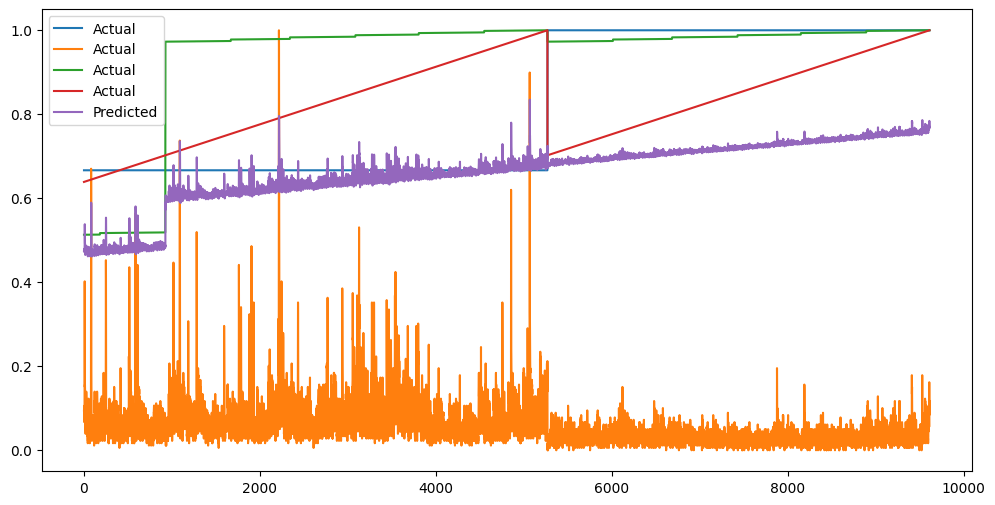

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(model.predict(X_test), label='Predicted')
plt.legend()
plt.show()

# **Well done** :)